# Correlations between datasets

In [818]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ms data

In [830]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])

In [831]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.943542e+08,1.240854e+09,1.048295e+08,9.087319e+07,1.831223e+08,1.831223e+08,6.043091e+08,1.943542e+08,1.943542e+08,1.240854e+09,...,2.528854e+08,1.831223e+08,1.048295e+08,4.645706e+08,4.645706e+08,1.893777e+08,1.831223e+08,1.831223e+08,2.528854e+08,2.662124e+08
000922,1.549112e+08,1.029110e+09,1.086362e+08,1.181268e+08,1.913892e+08,1.913892e+08,6.519549e+08,1.549112e+08,1.549112e+08,1.029110e+09,...,1.875943e+08,1.913892e+08,1.086362e+08,4.505443e+08,4.505443e+08,2.602672e+08,1.913892e+08,1.913892e+08,1.875943e+08,2.698756e+08
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,2.299686e+08,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08
000911,1.759171e+08,9.992782e+08,1.654314e+08,1.787409e+08,2.531031e+08,2.531031e+08,8.800410e+08,1.759171e+08,1.759171e+08,9.992782e+08,...,2.857401e+08,2.531031e+08,1.654314e+08,4.831389e+08,4.831389e+08,3.724425e+08,2.531031e+08,2.531031e+08,2.857401e+08,3.321024e+08
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.823817e+08,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,2.413772e+08,2.413874e+09,9.689814e+07,9.213682e+07,1.471158e+08,1.471158e+08,6.822826e+08,2.413772e+08,2.413772e+08,2.413874e+09,...,2.592504e+08,1.471158e+08,9.689814e+07,5.506742e+08,5.506742e+08,1.736489e+08,1.471158e+08,1.471158e+08,2.592504e+08,3.138085e+08
000804,3.452753e+08,3.397598e+09,1.905095e+08,2.577871e+08,2.881055e+08,2.881055e+08,1.122339e+09,3.452753e+08,3.452753e+08,3.397598e+09,...,3.308782e+08,2.881055e+08,1.905095e+08,5.763415e+08,5.763415e+08,3.355894e+08,2.881055e+08,2.881055e+08,3.308782e+08,5.460406e+08
000853,3.740657e+08,1.855998e+09,1.829394e+08,1.613276e+08,2.186666e+08,2.186666e+08,6.303671e+08,3.740657e+08,3.740657e+08,1.855998e+09,...,3.798451e+08,2.186666e+08,1.829394e+08,2.239344e+08,2.239344e+08,1.979400e+08,2.186666e+08,2.186666e+08,3.798451e+08,3.843281e+08


In [832]:
data_dist = ms_data.copy()
data_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)
data_dist['median']= data_dist.apply(lambda row:row[:-1].median(), axis=1)
data_dist['mean']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)
data_norm = data_dist.apply(lambda row: row[:-3]/row['mean'],axis=1)
data_norm.index = data_dist.index
data_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)

In [833]:
ms_data = data_norm2

In [902]:
ms_data.iloc[0:5]

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.158771,0.895271,0.946861,0.819830,1.523904,1.523904,1.089262,1.158771,1.158771,0.895271,...,1.192345,1.523904,0.946861,1.289678,1.289678,1.012158,1.523904,1.523904,1.192345,1.124045
000922,0.916172,0.736523,0.973346,1.057127,1.579881,1.579881,1.165686,0.916172,0.916172,0.736523,...,0.877381,1.579881,0.973346,1.240674,1.240674,1.379843,1.579881,1.579881,0.877381,1.130342
000927,0.931354,0.735943,1.273055,1.348861,1.487501,1.487501,1.231637,0.931354,0.931354,0.735943,...,1.002939,1.487501,1.273055,1.204434,1.204434,1.180231,1.487501,1.487501,1.002939,0.995580
000911,0.867721,0.596470,1.236200,1.334076,1.742538,1.742538,1.312335,0.867721,0.867721,0.596470,...,1.114597,1.742538,1.236200,1.109609,1.109609,1.646824,1.742538,1.742538,1.114597,1.160102
000925,0.934255,0.796164,1.017651,1.176241,1.594876,1.594876,1.131459,0.934255,0.934255,0.796164,...,0.888183,1.594876,1.017651,1.296092,1.296092,1.294251,1.594876,1.594876,0.888183,1.070498


panelist_data_df = dataframe with panelist data using values from 1. panelist

In [55]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

show distribution of each flavor in the panelist data

In [56]:
flavors = ['floral','fruit','wood','complexity','malt','sweet','peat','dried_fruits','aftertaste']

panelist data

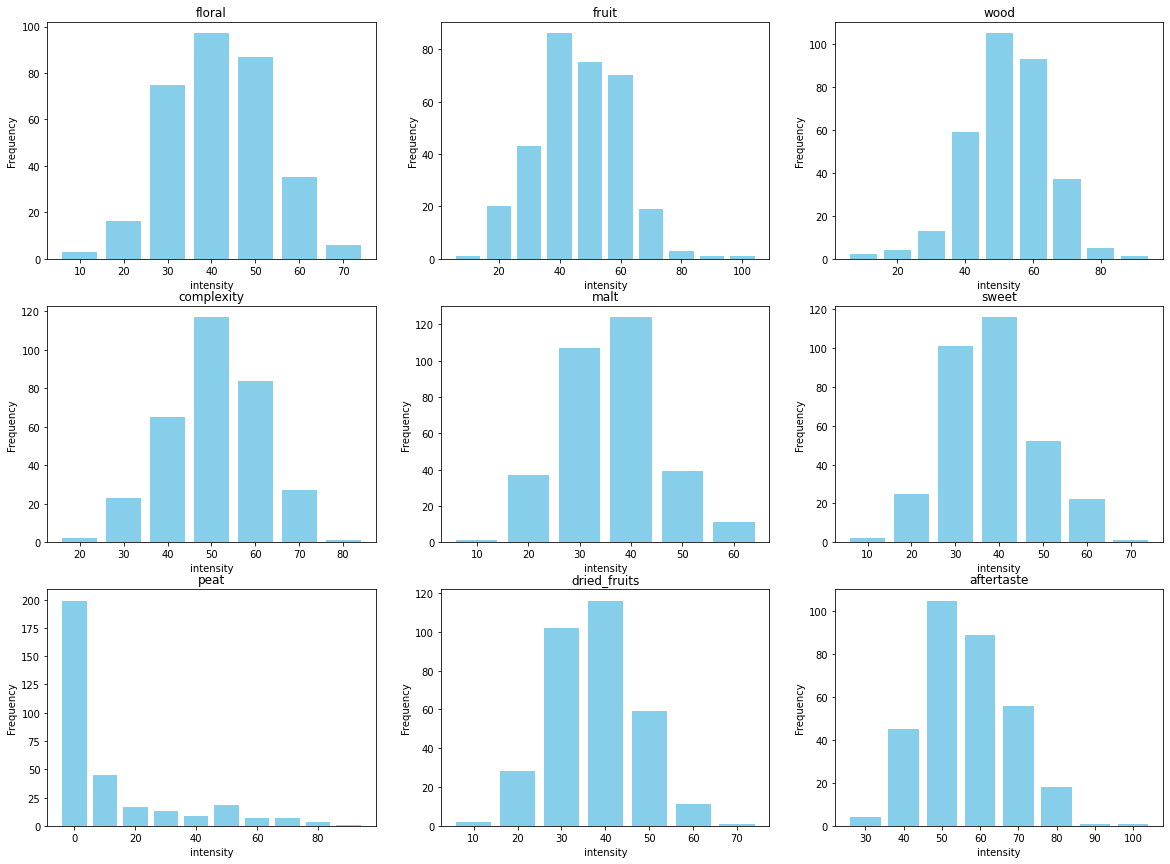

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_df[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


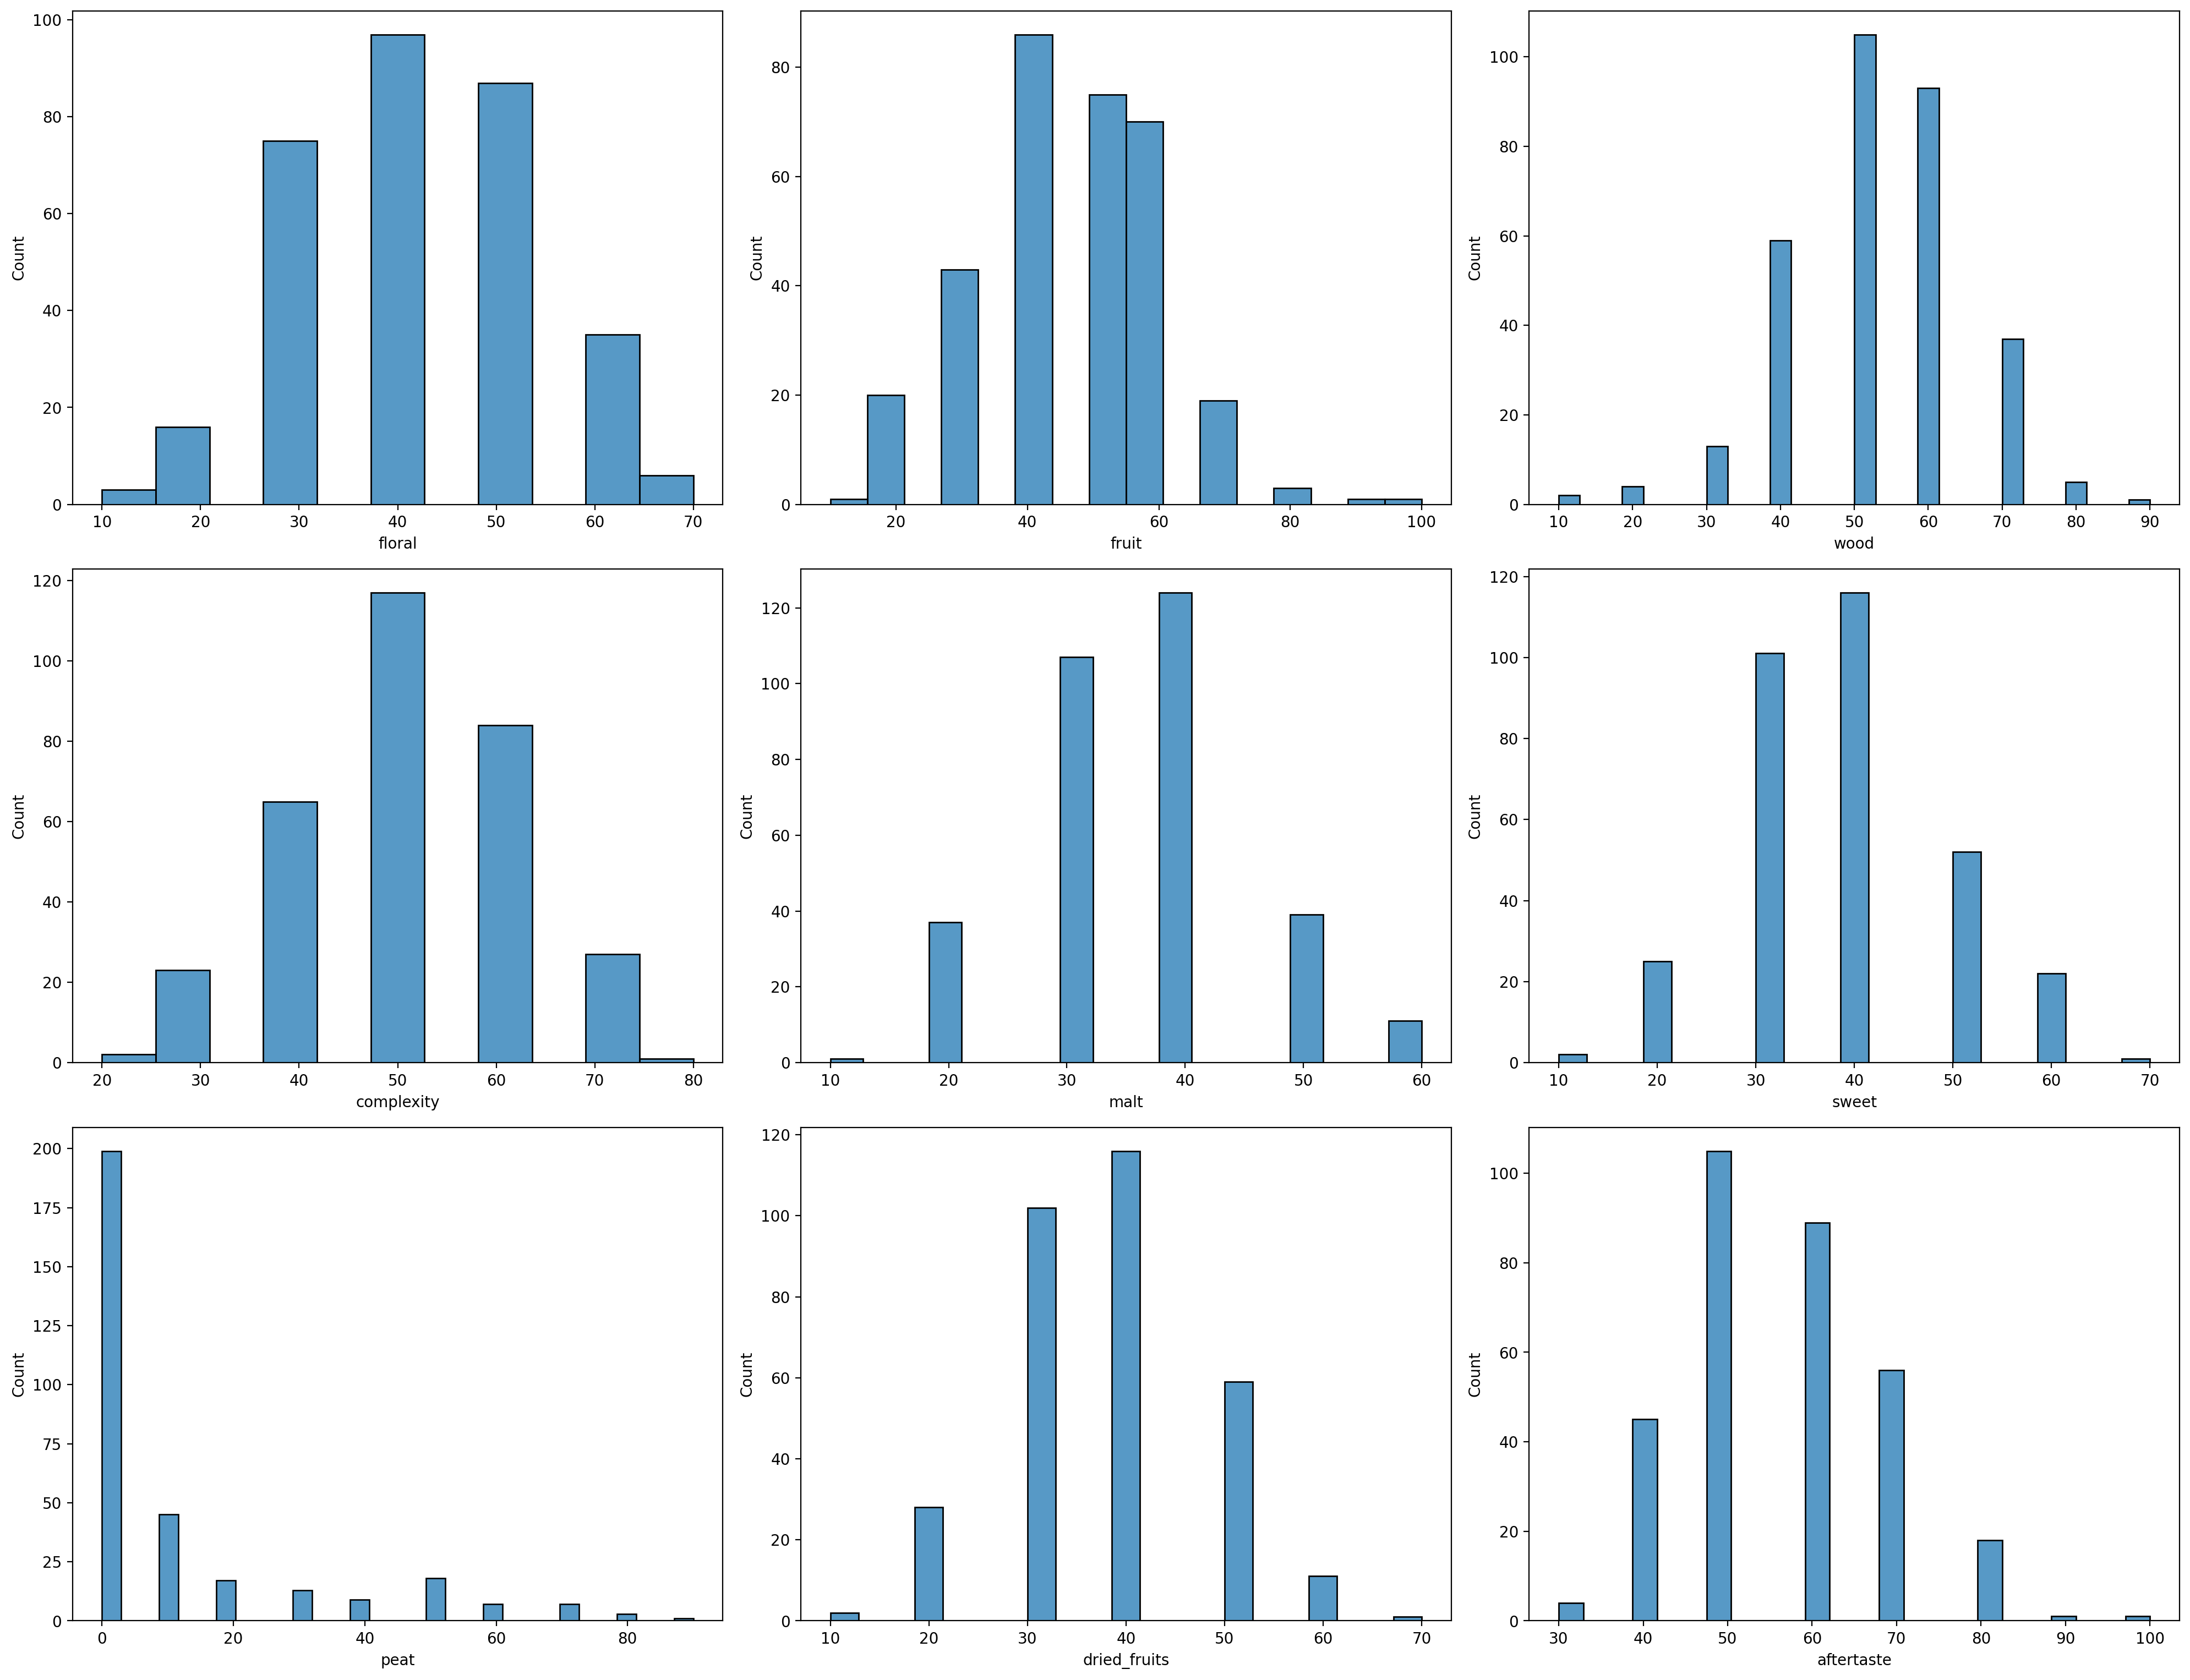

In [58]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.histplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.histplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.histplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.histplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.histplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.histplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.histplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.histplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.histplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


chatgpt data

In [602]:
chat_gpt_data = pd.read_csv("data/csv_WBS_CahtData_professional_HH.csv", delimiter=';')
chat_gpt_key = pd.read_csv("data/Sample_gesamtliste.csv", delimiter=';')


In [603]:
dict_chat_gpt = {key: value for key, value in zip(list(chat_gpt_key['Name']), np.nan_to_num(chat_gpt_key['Sample Key']).astype(int))}
chat_gpt_data.index = chat_gpt_data['Whisky Name'].replace(dict_chat_gpt)
chat_gpt_data.index.name = "sample key"
chat_gpt_data = chat_gpt_data[chat_gpt_data.index.map(lambda x: type(x) == np.int32)]
chat_gpt_data= chat_gpt_data.drop(columns="Whisky Name")
chat_gpt_data.columns= flavors
chat_gpt_data=chat_gpt_data*10
chat_gpt_data.index = chat_gpt_data.index.map(lambda x: '000'+str(x))

In [604]:
chat_gpt_data

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
sample key,,,,,,,,,
000354,0,70,60,70,0,70,0,70,60
000356,0,60,90,80,0,80,0,60,70
000357,0,0,80,70,0,0,60,0,80
000361,80,70,60,90,0,70,0,70,80
000362,0,80,70,80,0,80,0,60,70
...,...,...,...,...,...,...,...,...,...
000913,40,60,70,70,60,60,30,60,70
000925,70,80,60,80,40,50,0,50,70
000926,50,60,80,70,70,30,90,70,80


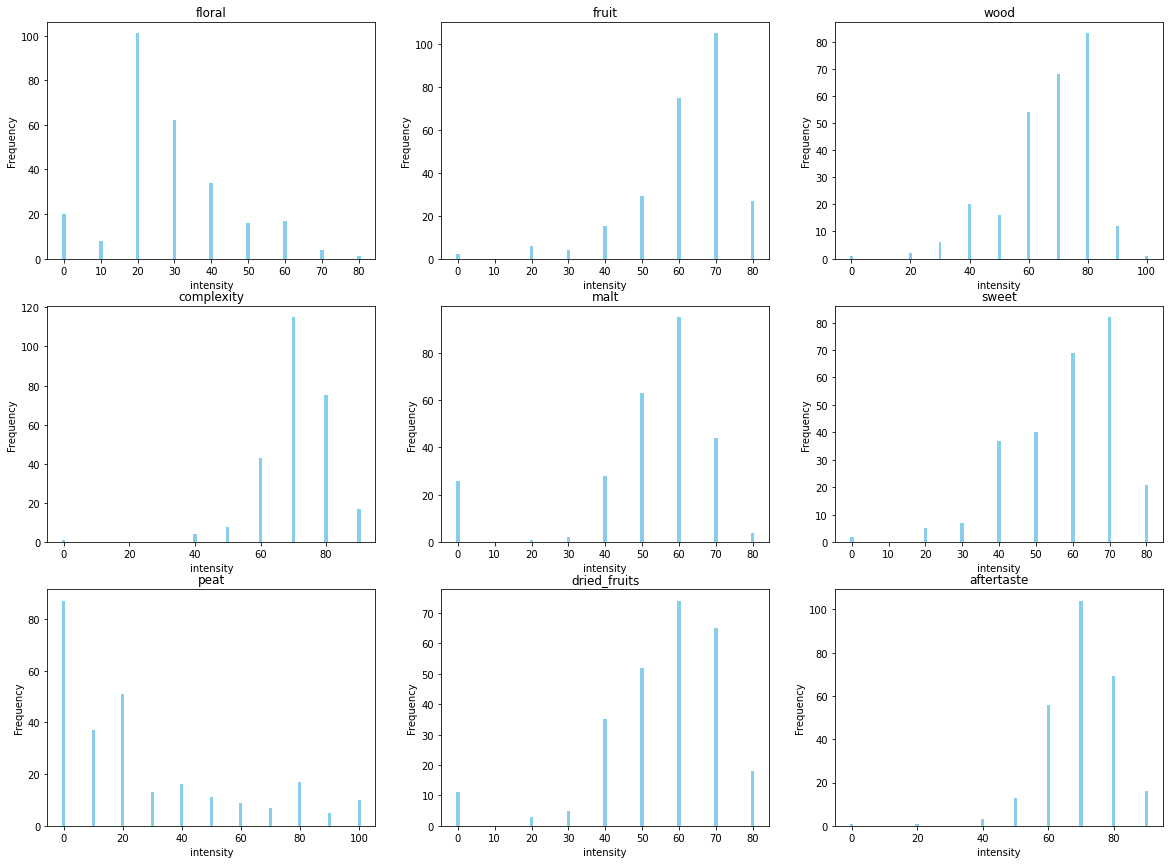

In [825]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = chat_gpt_data[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=1)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


In [835]:
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]

valid_indexes_all = [index for index in chat_gpt_data.index if index in valid_indexes]
valid_indexes_ms = [index for index in chat_gpt_data.index if index in ms_data.index]
valid_indexes_gpt = [index for index in chat_gpt_data.index if index in ms_data.index]


In [836]:
panelist_x_gpt_comp = panelist_data_df.loc[valid_indexes_all]

In [905]:
ms_data_comp.iloc[0:5]

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,1.199706,1.096160,0.885081,0.725355,0.735938,0.735938,0.974719,1.199706,1.199706,1.096160,...,1.037468,0.735938,0.885081,1.135270,1.135270,0.736188,0.735938,0.735938,1.037468,0.935398
000657,1.086004,1.259616,0.775672,0.689940,0.670537,0.670537,0.975031,1.086004,1.086004,1.259616,...,0.871527,0.670537,0.775672,1.127361,1.127361,0.672220,0.670537,0.670537,0.871527,0.915036
000658,1.113889,0.971559,1.142589,1.112428,1.054808,1.054808,1.100249,1.113889,1.113889,0.971559,...,1.087983,1.054808,1.142589,1.020518,1.020518,0.949219,1.054808,1.054808,1.087983,0.901856
000838,1.298360,0.862224,2.311178,1.935987,1.840937,1.840937,0.712960,1.298360,1.298360,0.862224,...,1.469272,1.840937,2.311178,0.424481,0.424481,0.997620,1.840937,1.840937,1.469272,1.126105
000839,1.621833,1.188670,2.170095,1.563707,1.103434,1.103434,0.627942,1.621833,1.621833,1.188670,...,0.732118,1.103434,2.170095,0.439718,0.439718,0.834108,1.103434,1.103434,0.732118,0.969709


In [837]:
ms_data_gpt_comp = ms_data.loc[valid_indexes_ms]


In [838]:
chat_gpt_data_comp=chat_gpt_data.loc[valid_indexes_gpt]



In [839]:
chat_gpt_data_comp

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
sample key,,,,,,,,,
000354,0,70,60,70,0,70,0,70,60
000356,0,60,90,80,0,80,0,60,70
000357,0,0,80,70,0,0,60,0,80
000361,80,70,60,90,0,70,0,70,80
000362,0,80,70,80,0,80,0,60,70
...,...,...,...,...,...,...,...,...,...
000911,50,80,90,90,50,50,10,80,90
000912,30,60,70,70,60,60,70,60,70
000925,70,80,60,80,40,50,0,50,70


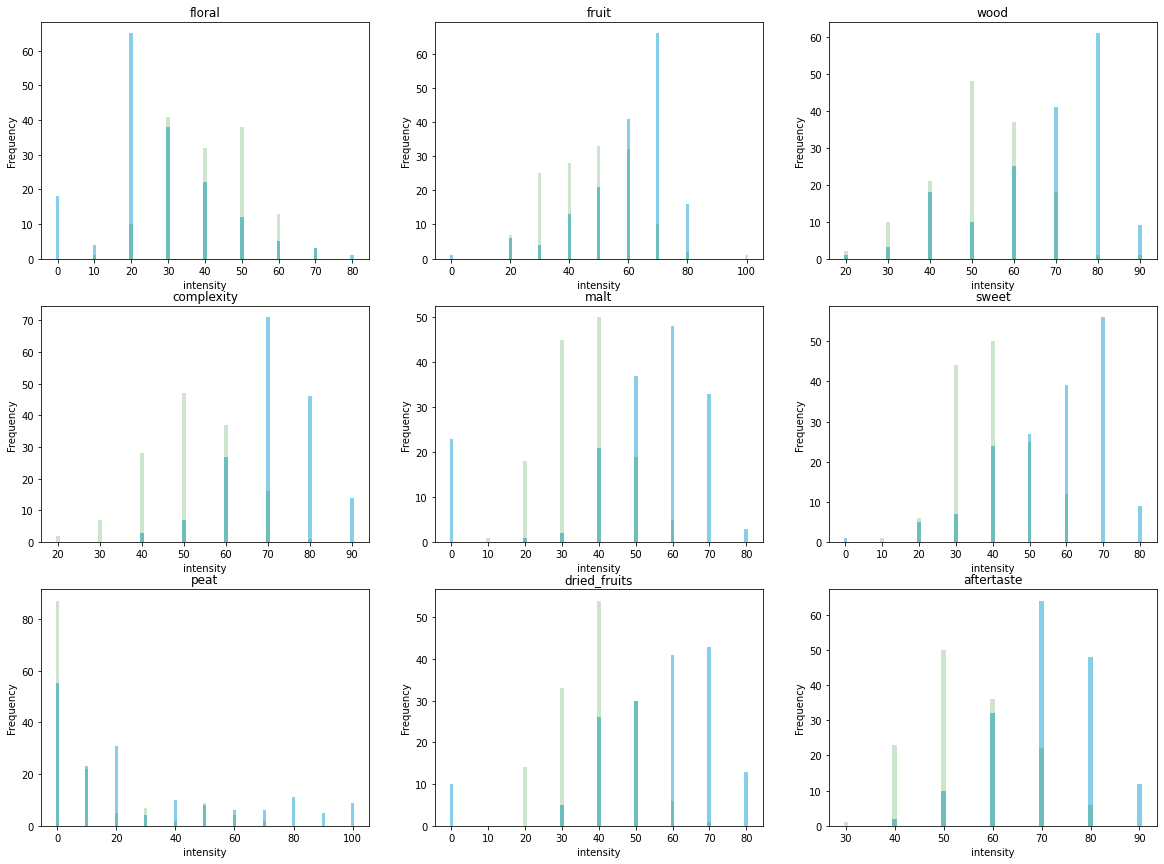

In [840]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts_1 = chat_gpt_data_comp[flavor].value_counts()
    counts_2 = panelist_x_gpt_comp[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts_1.index, counts_1.values, color='skyblue',width=1)
    plt.bar(counts_2.index, counts_2.values, color='green',width=1, alpha=0.2)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


### 1. Looking at one Flavor only

#### filter only sweet samples

ms_data_comp = df of ms data containing only comparable samples


panelist_data_comp = df of panelist data containing only comparable samples

In [841]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

chat_gpt_data_comp = df of chat gpt data containing only overlapp of samples with ms data


ms_data_gpt_comp = df of ms data containing only overlapp of samples with chat gpt data

In [842]:
chat_gpt_data_comp
#ms_data_gpt_comp

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
sample key,,,,,,,,,
000354,0,70,60,70,0,70,0,70,60
000356,0,60,90,80,0,80,0,60,70
000357,0,0,80,70,0,0,60,0,80
000361,80,70,60,90,0,70,0,70,80
000362,0,80,70,80,0,80,0,60,70
...,...,...,...,...,...,...,...,...,...
000911,50,80,90,90,50,50,10,80,90
000912,30,60,70,70,60,60,70,60,70
000925,70,80,60,80,40,50,0,50,70


In [843]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


sweet_descriptors =  all molecules that where labeled as sweet in flavornet

In [844]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]

In [845]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]

In [846]:
# look which smaples are sweet, average sweet and not sweet
sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]>= 60].index
not_sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]<= 20].index
#average_sweet_sample_ids = panelist_data_comp[(panelist_data_comp["sweet"] >= 30) & (panelist_data_comp["sweet"] <= 50)]["sweet"].index
sweet_sample_ids_gpt = chat_gpt_data_comp[chat_gpt_data_comp["sweet"]>= 60].index
not_sweet_sample_ids_gpt = chat_gpt_data_comp[chat_gpt_data_comp["sweet"]<= 20].index

In [847]:
# look which smaples are sweet, average sweet and not sweet
fruit_sample_ids = panelist_data_comp[panelist_data_comp["fruit"]>= 70].index
not_fruit_sample_ids = panelist_data_comp[panelist_data_comp["fruit"]<= 20].index
#average_fruit_sample_ids = panelist_data_comp[(panelist_data_comp["fruit"] >= 30) & (panelist_data_comp["fruit"] <= 50)]["fruit"].index
fruit_sample_ids_gpt = chat_gpt_data_comp[chat_gpt_data_comp["fruit"]>= 70].index
not_fruit_sample_ids_gpt = chat_gpt_data_comp[chat_gpt_data_comp["fruit"]<= 20].index

In [848]:
# create dataframe for plotting 
violin_df = pd.DataFrame.copy(ms_data_comp)
violin_df["category_sweet"]= list((pd.Series(violin_df.index)).apply((lambda x: 1 if x in sweet_sample_ids else (-1 if x in not_sweet_sample_ids else 0))))
violin_df["category_fruit"]= list((pd.Series(violin_df.index)).apply((lambda x: 1 if x in fruit_sample_ids else (-1 if x in not_fruit_sample_ids else 0))))

In [849]:
# gpt data: create dataframe for plotting 
violin_df_gpt = pd.DataFrame.copy(ms_data_gpt_comp)
violin_df_gpt["category_sweet"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in fruit_sample_ids_gpt else (-1 if x in not_sweet_sample_ids_gpt else 0))))
violin_df_gpt["category_fruit"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in fruit_sample_ids_gpt else (-1 if x in not_fruit_sample_ids_gpt else 0))))

violin_df = containing all CAS numbers and comparable samples plus their category meaning if the sample was categorized sweet, not sweet or average sweet regarding the panelist data

In [850]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category_sweet,category_fruit
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,1.199706,1.096160,0.885081,0.725355,0.735938,0.735938,0.974719,1.199706,1.199706,1.096160,...,0.885081,1.135270,1.135270,0.736188,0.735938,0.735938,1.037468,0.935398,0,-1
000657,1.086004,1.259616,0.775672,0.689940,0.670537,0.670537,0.975031,1.086004,1.086004,1.259616,...,0.775672,1.127361,1.127361,0.672220,0.670537,0.670537,0.871527,0.915036,0,0
000658,1.113889,0.971559,1.142589,1.112428,1.054808,1.054808,1.100249,1.113889,1.113889,0.971559,...,1.142589,1.020518,1.020518,0.949219,1.054808,1.054808,1.087983,0.901856,0,0
000838,1.298360,0.862224,2.311178,1.935987,1.840937,1.840937,0.712960,1.298360,1.298360,0.862224,...,2.311178,0.424481,0.424481,0.997620,1.840937,1.840937,1.469272,1.126105,0,1
000839,1.621833,1.188670,2.170095,1.563707,1.103434,1.103434,0.627942,1.621833,1.621833,1.188670,...,2.170095,0.439718,0.439718,0.834108,1.103434,1.103434,0.732118,0.969709,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,0.934255,0.796164,1.017651,1.176241,1.594876,1.594876,1.131459,0.934255,0.934255,0.796164,...,1.017651,1.296092,1.296092,1.294251,1.594876,1.594876,0.888183,1.070498,0,0
000926,1.195306,0.799962,1.124015,1.204234,1.242241,1.242241,1.066523,1.195306,1.195306,0.799962,...,1.124015,1.243213,1.243213,1.036239,1.242241,1.242241,1.214896,1.036415,0,0
000927,0.931354,0.735943,1.273055,1.348861,1.487501,1.487501,1.231637,0.931354,0.931354,0.735943,...,1.273055,1.204434,1.204434,1.180231,1.487501,1.487501,1.002939,0.995580,0,0


### 1. over all samples

In [851]:
import numpy as np

check correlation

samples which are categorised in sweet should be highly expressed in this cas number if the cas number is labeled as sweet

function which checks if intensity over all sweet samples should be higher than intensity over not sweet or average samples 

In [852]:
'''
if the difference is > 1.5 than H0 ist true and cas is significant, meaning over all labeled samples it is highly expressed for the flavor it was labeld with 
'''
def check_CAS(df,CAS, OSA):
    # check mean of one cas number over all sweet samples is higher than mean of cas numbers over all not sweet samples
    # add entries for other OSAs in the future
    flavor_true = df[df["category_" + OSA] == 1].index
    flavor_false = df[df["category_"+ OSA] == -1].index
    mean_flavor_true = np.mean(df[CAS].loc[flavor_true])
    mean_flavor_false = np.mean(df[CAS].loc[flavor_false])
    #print("flavor_true:"+str(mean_flavor_true))
    #print("flavor_false:"+str(mean_flavor_false))
    difference=mean_flavor_true/mean_flavor_false
    return difference

over all CAS numbers and samples

panelist data

In [853]:
all_dif = {}
for CAS in violin_df.columns:
    all_dif[CAS]=(check_CAS(violin_df,CAS, 'sweet'))

sig_CAS =[]
for dif in all_dif:
    if all_dif[dif] >=1.5:
        sig_CAS.append(dif)

len(sig_CAS)/len(all_dif.keys())

0.26430517711171664

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 41., 14.,  1., 30., 10., 26., 11., 12., 26., 26., 27., 13.,
        33., 31., 11., 15., 31., 19., 25., 43., 19.,  0.,  5.,  0., 22.,
         9., 14., 11., 16., 47.,  5., 25.,  4.,  2.,  0.,  1.,  5.,  0.,
         1.,  0., 19.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([-1.        , -0.95969968, -0.91939936, -0.87909904, -0.83879872,
        -0.7984984 , -0.75819808, -0.71789776, -0.67759744, -0.63729712,
        -0.5969968 , -0.55669648, -0.51639616, -0.47609584, -0.43579552,
        -0.3954952 , -0.35519488, -0.31489456, -0.27459424, -0.23429392,
        -0.1939936 , -0.15369328, -0.11339296, -0.07309264, -0.03279232,
         0.007508  ,  0.04780832,  0.08810864,  0.12840896,  0.168709

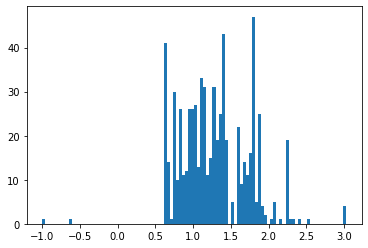

In [854]:
plt.hist(np.nan_to_num(all_dif.values()),100)

chat gpt

In [757]:
all_dif_gpt = {}
for CAS in violin_df_gpt.columns:
    all_dif_gpt[CAS]=(check_CAS(violin_df_gpt,CAS, 'sweet'))

sig_CAS_gpt =[]
for dif in all_dif_gpt:
    if all_dif_gpt[dif] >=1.5:
        sig_CAS_gpt.append(dif)
len(sig_CAS_gpt)/len(all_dif_gpt.keys())

C:\Users\Franz\AppData\Local\Temp\ipykernel_20448\2538974407.py:13: RuntimeWarning: invalid value encountered in scalar divide
  difference=mean_flavor_true/mean_flavor_false


0.07220708446866485

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  6.,  1.,  1.,
         0.,  5.,  1., 12., 11.,  0., 43., 11.,  9., 61., 19.,  8., 19.,
        30., 67., 32., 27.,  3., 63., 48., 25., 22., 23.,  0., 10.,  4.,
        30.,  6.,  5.,  0.,  8., 16.,  0., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([-1.20000000e+00, -1.16669208e+00, -1.13338417e+00, -1.10007625e+00,
        -1.06676834e+00, -1.03346042e+00, -1.00015250e+00, -9.66844588e-01,
        -9.33536672e-01, -9.00228755e-01, -8.66920839e-01, -8.33612923e-01,
        -8.00305007e-01, -7.66997091e-01, -7.33689175e-01, -7.00381259e-01,
        -6.67073343e-01, -6.33765427e-01, -6.00457511e-01, -5.67149595e-01,
        -5.33841679e-01, -5.00533763e-01, -4.67225847e

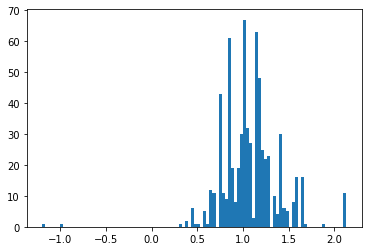

In [758]:
plt.hist(np.nan_to_num(all_dif_gpt).values(),100)

check one CAS number only

In [855]:
check_CAS(violin_df,'100-51-6','sweet')

1.4219386139951735

In [856]:
check_CAS(violin_df, '6485-40-1', 'sweet')

0.98764797330445

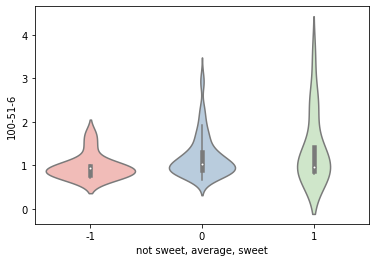

In [857]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category_sweet',y= '100-51-6', data=violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

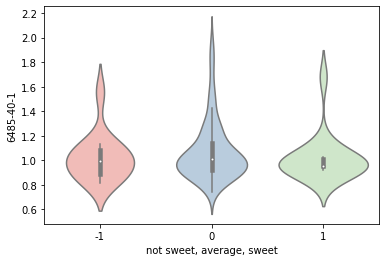

In [858]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category_sweet',y= '6485-40-1' , data=violin_df[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

chat gpt data

In [859]:
check_CAS(violin_df_gpt,'6485-40-1','sweet')

0.7506238969158334

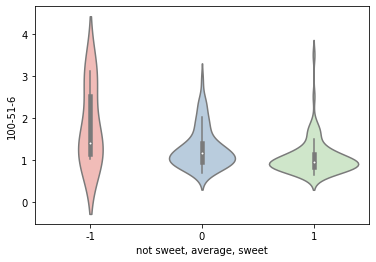

In [860]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category_sweet',y= '100-51-6', data=violin_df_gpt[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

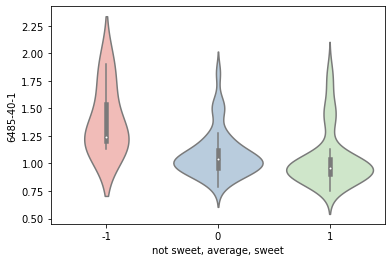

In [861]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category_sweet',y= '6485-40-1' , data=violin_df_gpt[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

Looking at all samples considering only sweet CAS numbers

In [862]:
# filter for CAS numbers labeled sweet
sweet_cas_violin_df = pd.DataFrame.copy(violin_df[sweet_descriptors_CAS] )
sweet_cas_violin_df['category_sweet'] = pd.DataFrame.copy(violin_df['category_sweet'])
#sweet_cas_violin_df = contains all sample and only those CAS numbers which are labeled as sweet
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1,category_sweet
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,1.476180,1.001602,0.736188,1.096160,0.836674,0.995193,1.135270,0.697640,0.682565,1.199706,...,1.250415,1.695450,1.037468,1.001602,0.886016,1.203043,NaN,0.730187,NaN,0
000657,1.193609,0.910797,0.672220,1.259616,0.755817,0.772095,1.127361,0.600857,0.625016,1.086004,...,1.181079,0.906492,0.871527,0.910797,0.858624,1.114330,NaN,0.679334,NaN,0
000658,1.280524,1.218284,0.949219,0.971559,0.856168,0.986919,1.020518,1.004488,1.012747,1.113889,...,1.119251,0.906454,1.087983,1.218284,1.126875,1.083278,NaN,0.914709,NaN,0
000838,0.886525,1.257309,0.997620,0.862224,1.465913,3.474943,0.424481,2.619754,1.463129,1.298360,...,0.427135,1.261447,1.469272,1.257309,0.962216,0.611646,NaN,1.399990,NaN,0
000839,0.688739,1.189161,0.834108,1.188670,1.335261,1.935598,0.439718,1.229415,0.819087,1.621833,...,0.386190,1.519311,0.732118,1.189161,1.290221,0.402952,NaN,0.671557,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,0.893193,1.223685,1.294251,0.796164,1.211635,0.887451,1.296092,1.048851,1.132449,0.934255,...,1.191444,1.278398,0.888183,1.223685,1.251362,1.181462,NaN,1.027327,NaN,0
000926,1.273807,1.273231,1.036239,0.799962,0.827910,0.901421,1.243213,0.953046,1.199211,1.195306,...,1.380789,1.055861,1.214896,1.273231,1.246252,1.293922,NaN,1.001911,NaN,0
000927,0.908949,1.479016,1.180231,0.735943,0.924328,0.903858,1.204434,1.211927,1.366148,0.931354,...,1.095713,1.031234,1.002939,1.479016,1.282230,1.156340,NaN,0.897794,NaN,0


In [863]:
sweet_cas_violin_df["sum"]= sweet_cas_violin_df.apply(lambda row:row[0:-1].sum(), axis=1)

In [864]:
sweet_cas_violin_df["mean"]= sweet_cas_violin_df.apply(lambda row:row[0:-2].mean(), axis=1)

In [865]:
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1,category_sweet,sum,mean
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,1.476180,1.001602,0.736188,1.096160,0.836674,0.995193,1.135270,0.697640,0.682565,1.199706,...,1.037468,1.001602,0.886016,1.203043,NaN,0.730187,NaN,0,55.515311,0.973953
000657,1.193609,0.910797,0.672220,1.259616,0.755817,0.772095,1.127361,0.600857,0.625016,1.086004,...,0.871527,0.910797,0.858624,1.114330,NaN,0.679334,NaN,0,50.852596,0.892151
000658,1.280524,1.218284,0.949219,0.971559,0.856168,0.986919,1.020518,1.004488,1.012747,1.113889,...,1.087983,1.218284,1.126875,1.083278,NaN,0.914709,NaN,0,61.848084,1.085054
000838,0.886525,1.257309,0.997620,0.862224,1.465913,3.474943,0.424481,2.619754,1.463129,1.298360,...,1.469272,1.257309,0.962216,0.611646,NaN,1.399990,NaN,0,77.141267,1.353356
000839,0.688739,1.189161,0.834108,1.188670,1.335261,1.935598,0.439718,1.229415,0.819087,1.621833,...,0.732118,1.189161,1.290221,0.402952,NaN,0.671557,NaN,0,62.048616,1.088572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,0.893193,1.223685,1.294251,0.796164,1.211635,0.887451,1.296092,1.048851,1.132449,0.934255,...,0.888183,1.223685,1.251362,1.181462,NaN,1.027327,NaN,0,63.472564,1.113554
000926,1.273807,1.273231,1.036239,0.799962,0.827910,0.901421,1.243213,0.953046,1.199211,1.195306,...,1.214896,1.273231,1.246252,1.293922,NaN,1.001911,NaN,0,64.744566,1.135870
000927,0.908949,1.479016,1.180231,0.735943,0.924328,0.903858,1.204434,1.211927,1.366148,0.931354,...,1.002939,1.479016,1.282230,1.156340,NaN,0.897794,NaN,0,65.270953,1.145104


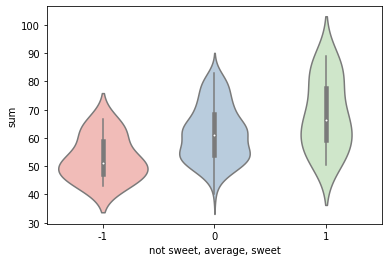

In [866]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_sweet', y='sum', data=sweet_cas_violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

<AxesSubplot:xlabel='category_sweet', ylabel='mean'>

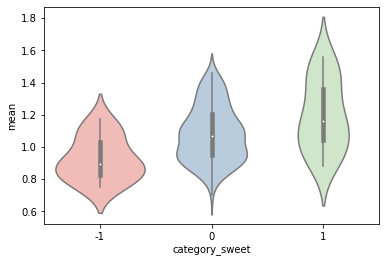

In [867]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_sweet', y='mean', data=sweet_cas_violin_df, palette="Pastel1")


In [876]:
flavor_true_sweet = sweet_cas_violin_df[sweet_cas_violin_df["category_sweet"] == 1].index
flavor_true_not_sweet = sweet_cas_violin_df[sweet_cas_violin_df["category_sweet"] == -1].index


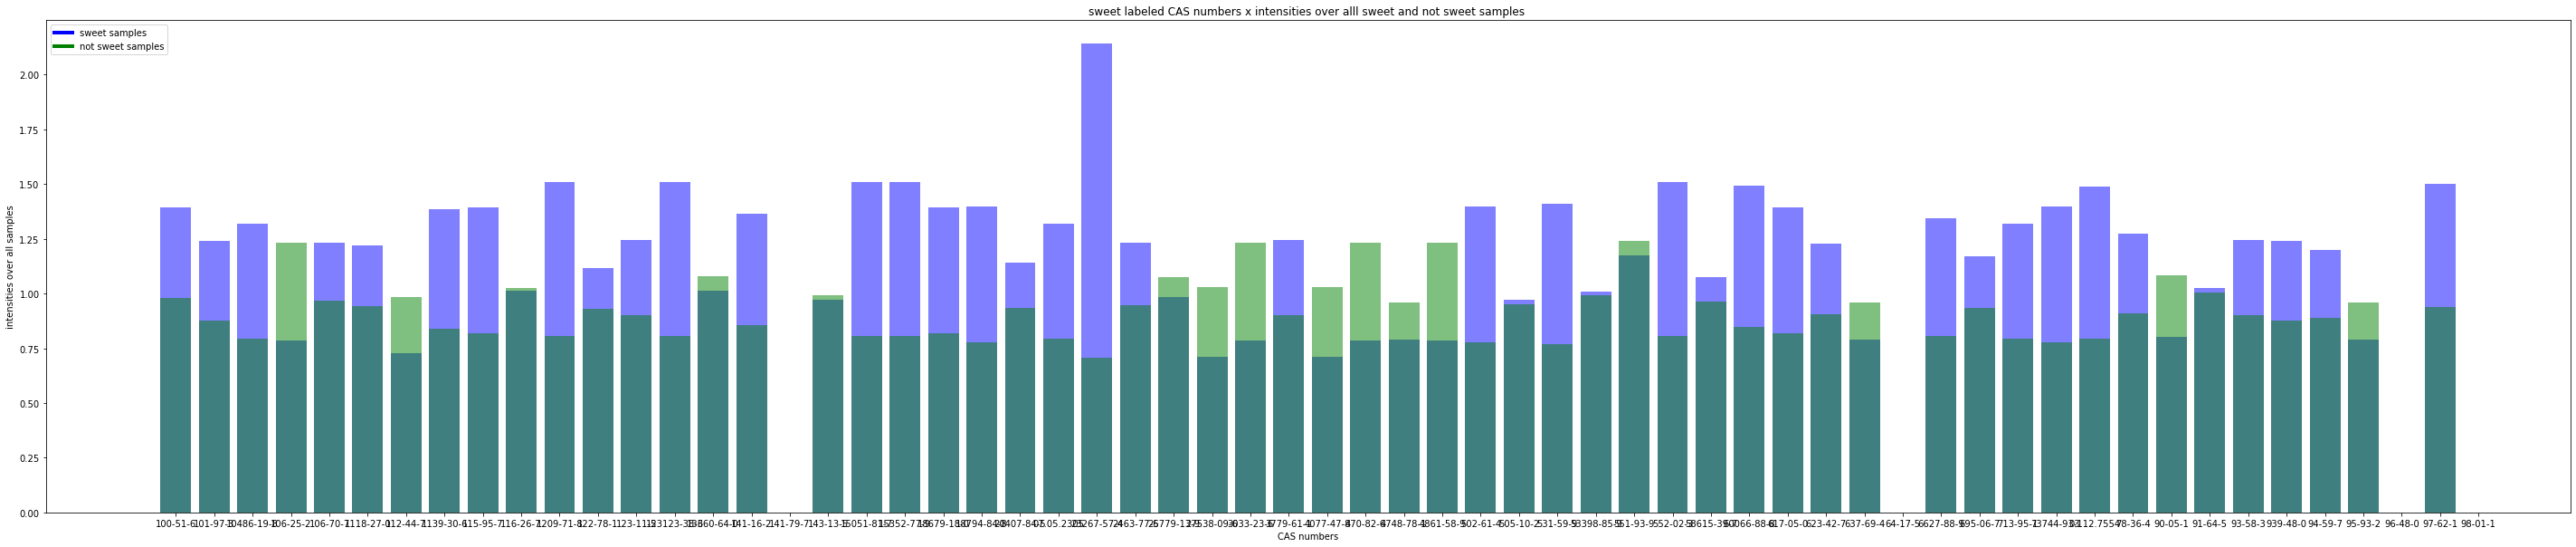

In [878]:
plt.figure(figsize=(50, 10))           
plt.bar(sweet_cas_violin_df.loc[flavor_true_sweet].iloc[:,:-3].columns, sweet_cas_violin_df.loc[flavor_true_sweet].iloc[:,:-3].mean(axis=0), color='b', alpha=0.5)
plt.bar(sweet_cas_violin_df.loc[flavor_true_not_sweet].iloc[:,:-3].columns, sweet_cas_violin_df.loc[flavor_true_not_sweet].iloc[:,:-3].mean(axis=0),color="g",  alpha=0.5)
plt.xlabel('CAS numbers')
plt.ylabel('intensities over all samples')
plt.title('sweet labeled CAS numbers x intensities over alll sweet and not sweet samples ')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet samples'),
                  Line2D([0], [0], color='g', lw=4, label='not sweet samples')]
plt.legend(handles=legend_entries)
plt.show()


chat gpt

In [868]:
# filter for CAS numbers labeled sweet
sweet_cas_violin_df_gpt = pd.DataFrame.copy(violin_df_gpt[sweet_descriptors_CAS] )
sweet_cas_violin_df_gpt['category_sweet'] = pd.DataFrame.copy(violin_df_gpt['category_sweet'])
#sweet_cas_violin_df = contains all sample and only those CAS numbers which are labeled as sweet
sweet_cas_violin_df_gpt["sum"]= sweet_cas_violin_df_gpt.apply(lambda row:row[0:-1].sum(), axis=1)
sweet_cas_violin_df_gpt["mean"]= sweet_cas_violin_df_gpt.apply(lambda row:row[0:-2].mean(), axis=1)

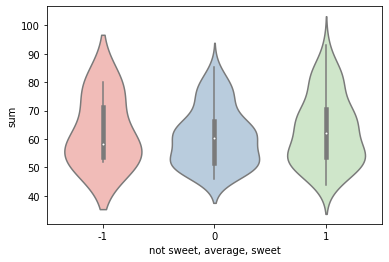

In [869]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_sweet', y='sum', data=sweet_cas_violin_df_gpt, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

In [871]:
flavor_true_sweet_gpt = sweet_cas_violin_df_gpt[sweet_cas_violin_df_gpt["category_sweet"] == 1].index
flavor_true_not_sweet_gpt = sweet_cas_violin_df_gpt[sweet_cas_violin_df_gpt["category_sweet"] == -1].index


In [874]:
flavor_true_sweet_gpt

Index(['000354', '000361', '000362', '000367', '000371', '000373', '000377',
       '000378', '000386', '000388', '000389', '000390', '000404', '000430',
       '000431', '000434', '000441', '000447', '000451', '000452', '000453',
       '000477', '000479', '000480', '000484', '000489', '000492', '000493',
       '000494', '000504', '000529', '000548', '000557', '000558', '000559',
       '000564', '000572', '000574', '000575', '000576', '000577', '000578',
       '000586', '000588', '000591', '000593', '000606', '000607', '000610',
       '000611', '000613', '000614', '000617', '000618', '000622', '000626',
       '000627', '000628', '000629', '000633', '000635', '000636', '000642',
       '000655', '000763', '000783', '000789', '000796', '000797', '000813',
       '000815', '000835', '000842', '000856', '000874', '000875', '000878',
       '000879', '000880', '000909', '000911', '000925'],
      dtype='object', name='sample_key')

In [875]:
flavor_true_not_sweet_gpt

Index(['000357', '000408', '000410', '000515', '000654', '000656'], dtype='object', name='sample_key')

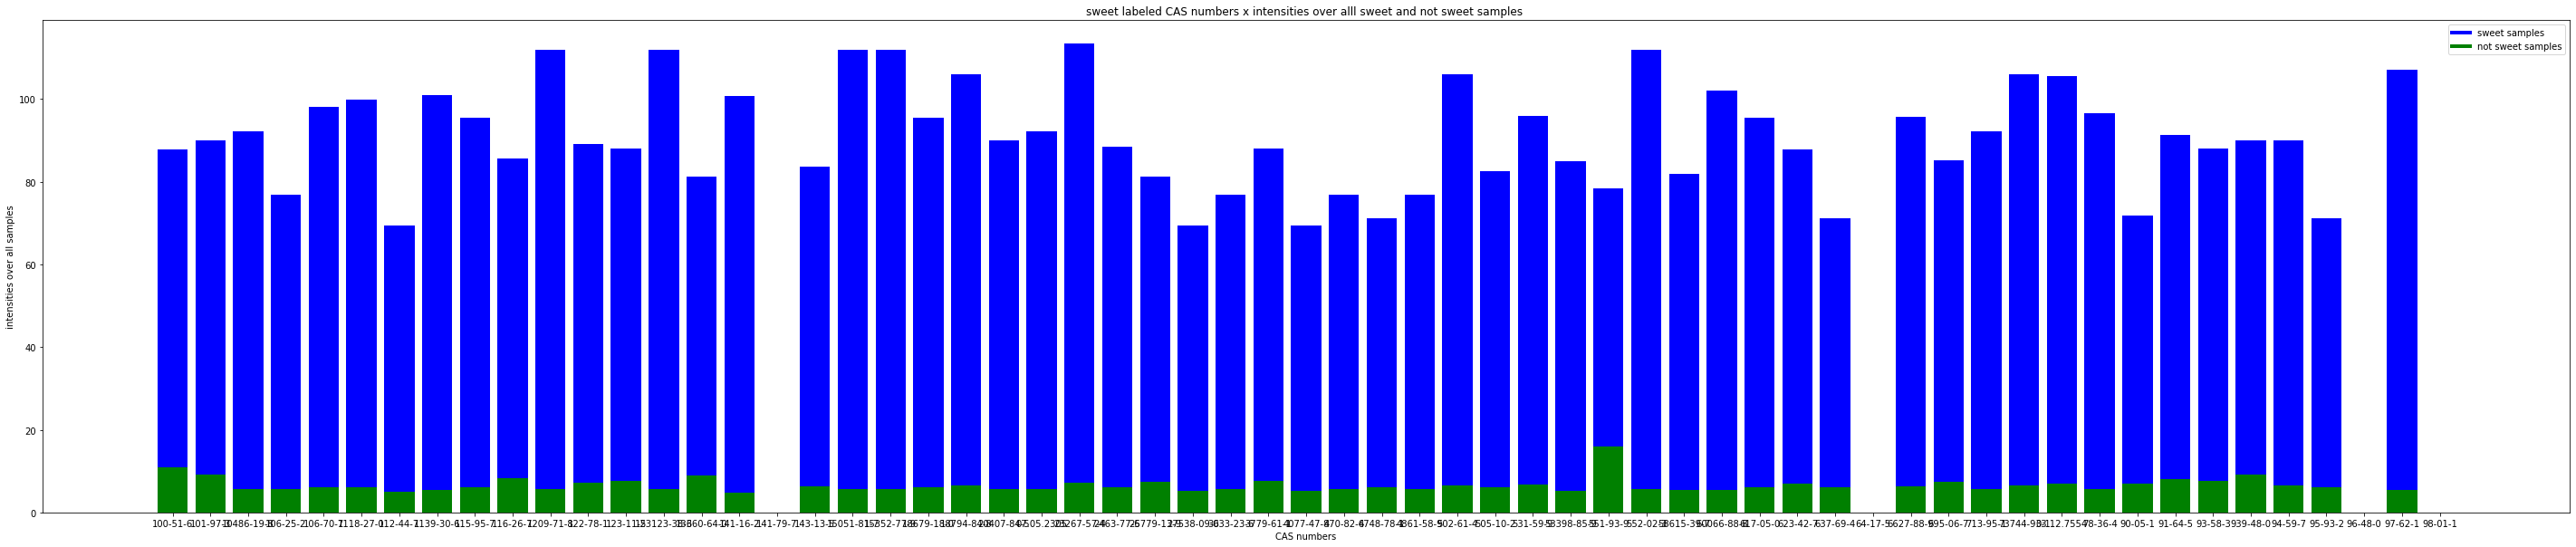

In [872]:
plt.figure(figsize=(50, 10))           
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].sum(axis=0), color='b')
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].sum(axis=0),color="g")
plt.xlabel('CAS numbers')
plt.ylabel('intensities over all samples')
plt.title('sweet labeled CAS numbers x intensities over alll sweet and not sweet samples ')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet samples'),
                  Line2D([0], [0], color='g', lw=4, label='not sweet samples')]
plt.legend(handles=legend_entries)
plt.show()
# => bias because there are qay more samples labeld sweet than not sweet so sum doesn't say anything


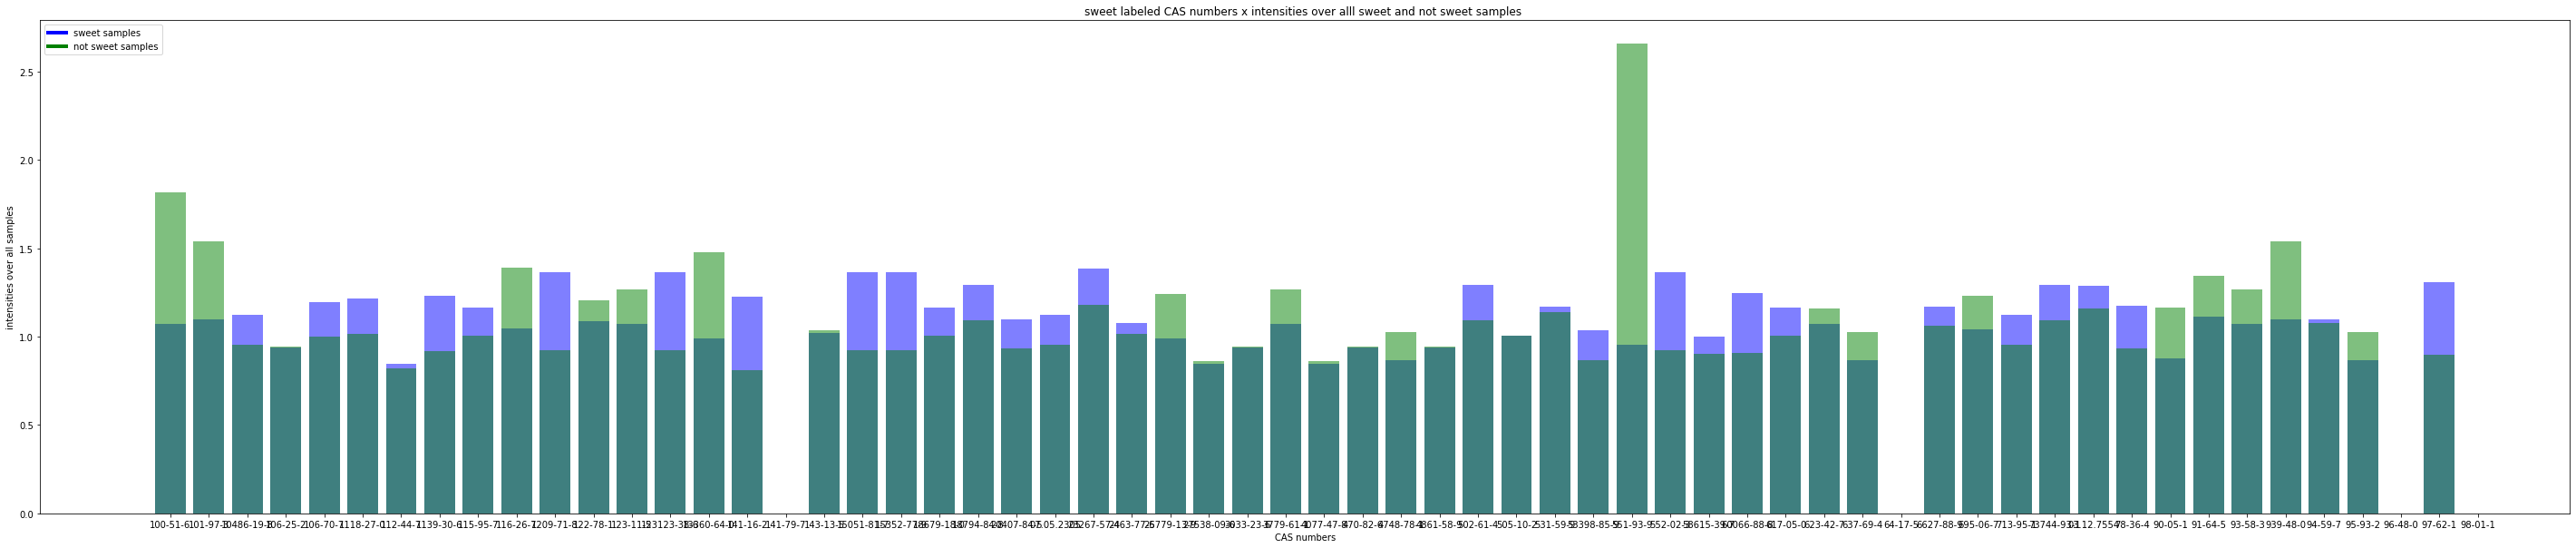

In [873]:
plt.figure(figsize=(50, 10))           
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].mean(axis=0), color='b', alpha=0.5)
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].mean(axis=0),color="g",  alpha=0.5)
plt.xlabel('CAS numbers')
plt.ylabel('intensities over all samples')
plt.title('sweet labeled CAS numbers x intensities over alll sweet and not sweet samples ')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet samples'),
                  Line2D([0], [0], color='g', lw=4, label='not sweet samples')]
plt.legend(handles=legend_entries)
plt.show()


#### T - Test
checking difference of intensity for one CAS between different samples

In [879]:
from scipy import stats  

In [880]:
flavor_true = violin_df[violin_df["category_sweet"] == 1].index
flavor_false = violin_df[violin_df["category_sweet"] == -1].index

In [881]:
t_stat, p_val = stats.ttest_ind(violin_df['100-51-6'].loc[flavor_true], violin_df['100-51-6'].loc[flavor_false])  


In [882]:
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 1.770159364236142
p-value = 0.08759008413931094


In [884]:
check_CAS(violin_df,'100-51-6','sweet')

1.4219386139951735

In [885]:
def check_significant_CAS(df, flavor):
    #check this for all Cas numbers that are available
    alpha = 0.05
    labels=[]
    p_values = []
    significant_CAS =[]
    flavor_true = df[df["category_"+ flavor] == 1].index
    flavor_false = df[df["category_"+flavor] == -1].index
    for CAS in df.iloc[:,:-2].columns:
        t_stat, p_val = stats.ttest_ind(df[CAS].loc[flavor_true], df[CAS].loc[flavor_false])  
        print("CAS: " +str(CAS))
        print("t-statistic = " + str(t_stat))  
        print("p-value = " + str(p_val))
        labels.append(CAS)
        p_values.append(p_val)
        if p_val < alpha:
            significant_CAS.append(CAS)
    return(labels, p_values, significant_CAS)

### sweet

only sweet CAS 

In [886]:
# remove rows with only 0 
sweet_cas_violin_df = sweet_cas_violin_df.loc[:, (sweet_cas_violin_df != 0).any(axis=0)]

In [887]:
#check this for all Cas numbers that are labeled sweet
alpha = 0.05
labels=[]
p_values = []
significant_CAS =[]
for CAS in sweet_cas_violin_df.iloc[:,:-2].columns:
    t_stat, p_val = stats.ttest_ind(violin_df[CAS].loc[flavor_true], violin_df[CAS].loc[flavor_false])  
    print("CAS: " +str(CAS))
    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    labels.append(CAS)
    p_values.append(p_val)
    if p_val < alpha:
        significant_CAS.append(CAS)

CAS: 100-51-6
t-statistic = 1.770159364236142
p-value = 0.08759008413931094
CAS: 101-97-3
t-statistic = 3.1847467646659187
p-value = 0.003539022629342556
CAS: 10486-19-8
t-statistic = 3.8579810081019525
p-value = 0.0006141507147269126
CAS: 106-25-2
t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 106-70-7
t-statistic = 2.541390374190605
p-value = 0.01686349812619566
CAS: 1118-27-0
t-statistic = 2.6878111239031743
p-value = 0.011969523161895354
CAS: 112-44-7
t-statistic = -2.702275189940866
p-value = 0.011565890188159933
CAS: 1139-30-6
t-statistic = 3.0988633547485787
p-value = 0.0043922193578478565
CAS: 115-95-7
t-statistic = 3.8259665238299525
p-value = 0.0006687471581336039
CAS: 116-26-7
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 1209-71-8
t-statistic = 3.2589232295622117
p-value = 0.002932121625092656
CAS: 122-78-1
t-statistic = 2.435442603584567
p-value = 0.021495786675420413
CAS: 123-11-5
t-statistic = 2.942691477335345
p-value = 0.00

C:\Users\Franz\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [888]:
len(significant_CAS)/len(sweet_cas_violin_df.iloc[:,:-3].columns)

0.7540983606557377

all CAS numbers

In [889]:
label_all,p_val_all, significant_CAS_all = check_significant_CAS(violin_df,'sweet')

CAS: 6485-40-1
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 3033-23-6
t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 21284-22-0
t-statistic = 3.2589232295622117
p-value = 0.002932121625092656
CAS: 38427-78-0
t-statistic = 3.5594832572891844
p-value = 0.0013500545591794873
CAS: 495-61-4
t-statistic = 3.42702274471465
p-value = 0.0019048665327345234
CAS: 29873-99-2
t-statistic = 3.42702274471465
p-value = 0.0019048665327345234
CAS: 6909-30-4
t-statistic = 1.4752470445531403
p-value = 0.15130331901758248
CAS: 99-49-0
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 2244-16-8
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 876-17-5
t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 5989-27-5
t-statistic = 2.942691477335345
p-value = 0.006469789897028551
CAS: 4674-50-4
t-statistic = 3.5594832572891844
p-value = 0.0013500545591794873
CAS: 2243-33-6
t-statistic = 2.942691477335345
p-valu

In [890]:
len(significant_CAS_all)/len(label_all)

0.5614754098360656

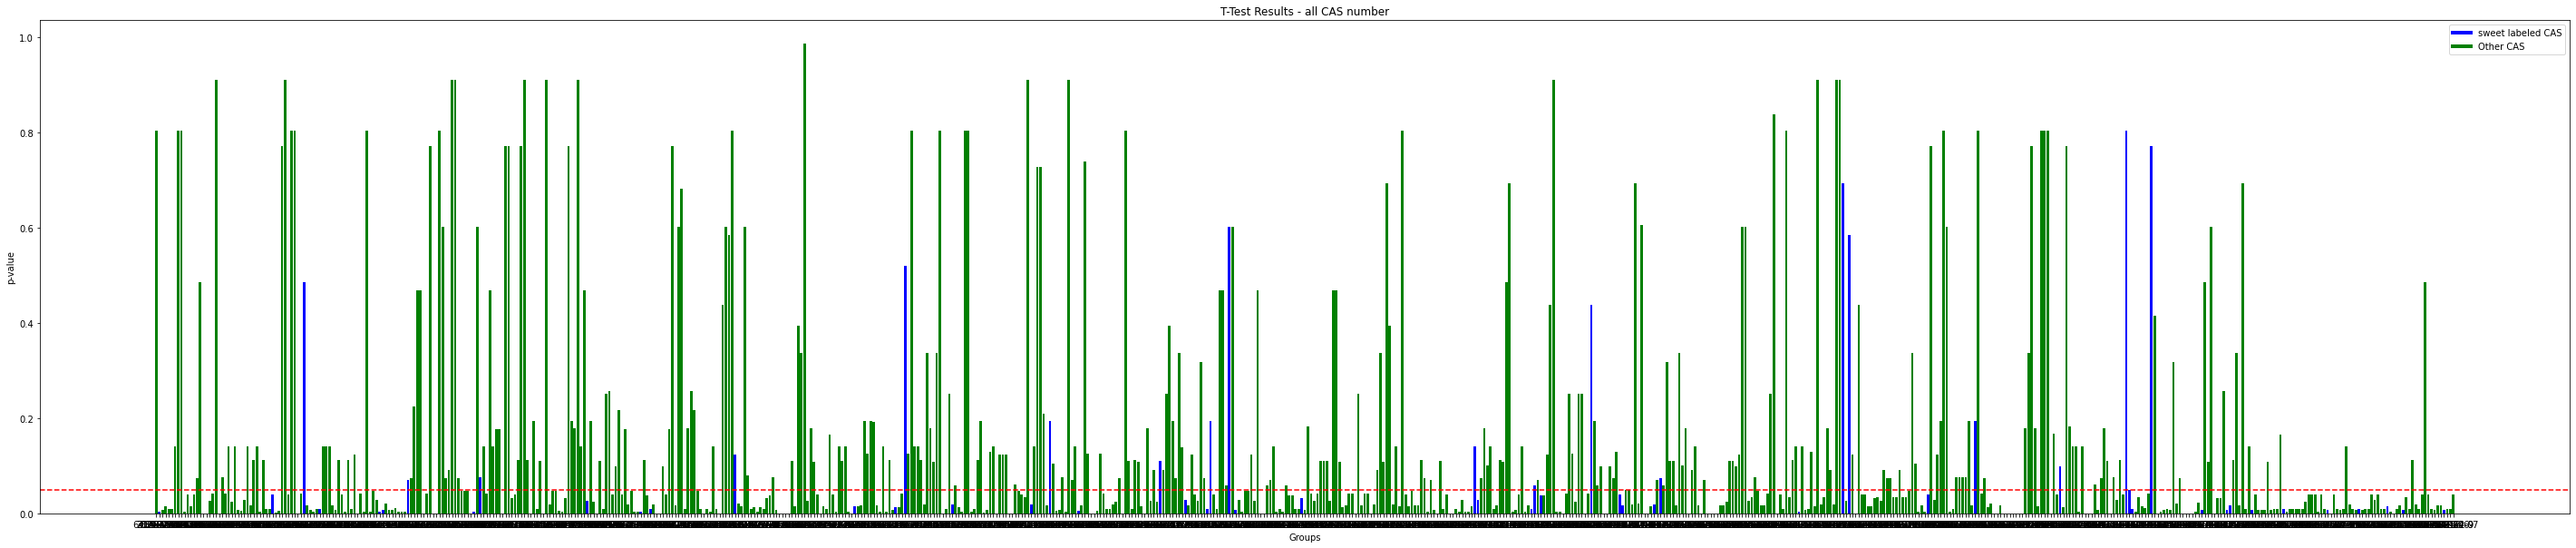

In [186]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
colors = ['b' if x in sweet_descriptors_CAS else 'g' for x in label_all]
plt.bar(label_all, p_val_all, color=colors)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet labeled CAS'),
                  Line2D([0], [0], color='g', lw=4, label='Other CAS')]
plt.legend(handles=legend_entries)

plt.show()


=> Don't really make sense to compare with other CAS number which are not labeled sweet since they still can have a high intensity but correspond to different flavors

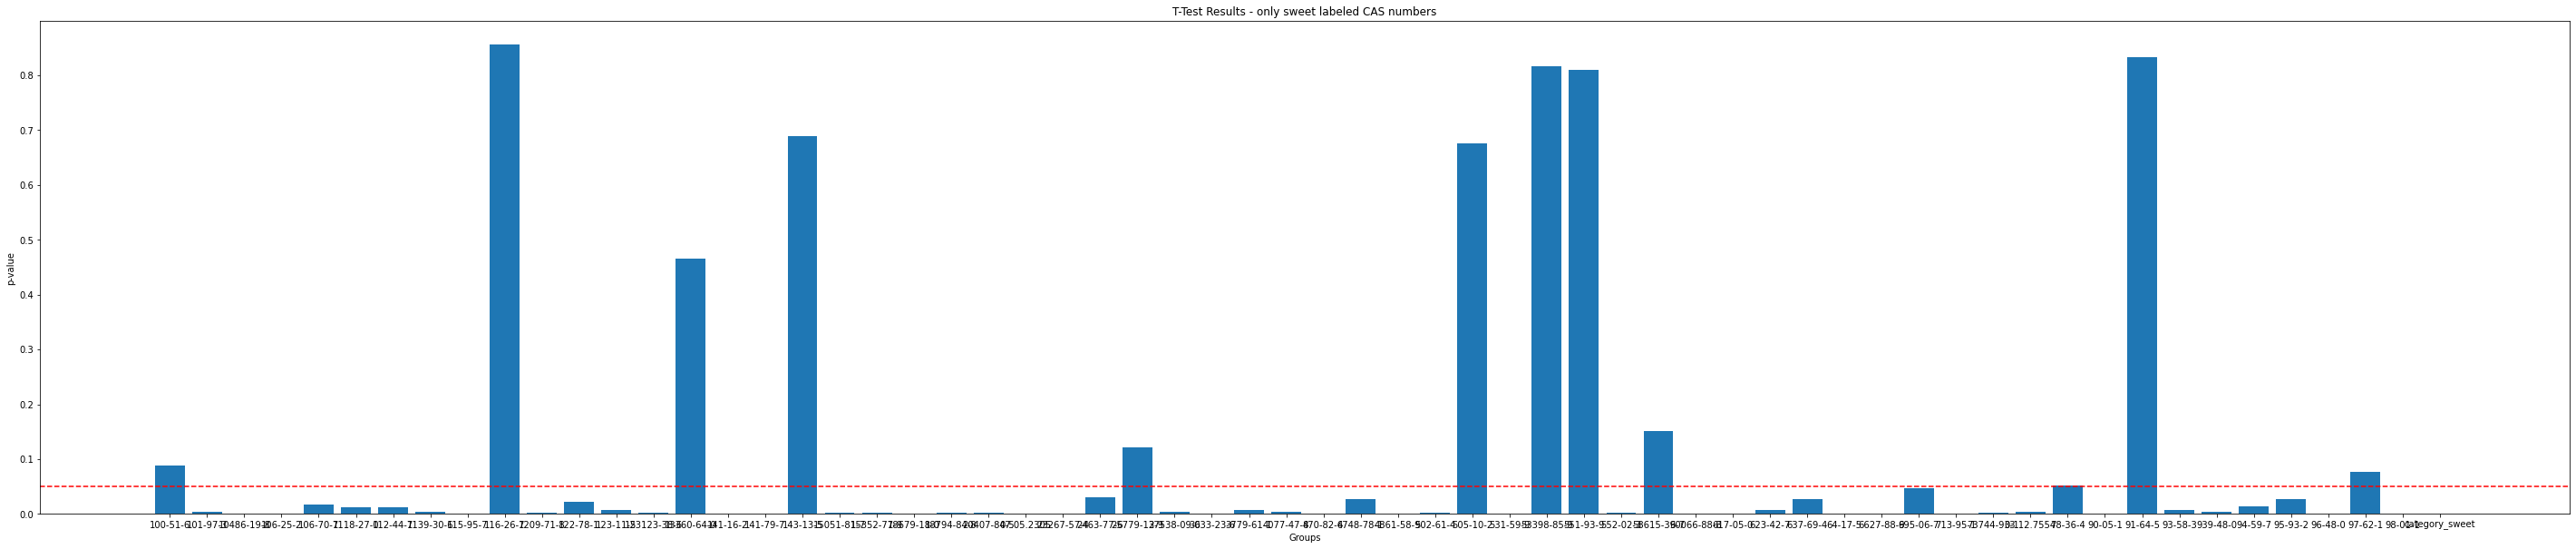

In [891]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
plt.bar(labels, p_values)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - only sweet labeled CAS numbers')
plt.show()


chat gpt

only sweet CAS 

In [892]:
flavor_true_gpt = violin_df_gpt[violin_df_gpt["category_sweet"] == 1].index
flavor_false_gpt= violin_df_gpt[violin_df_gpt["category_sweet"] == -1].index

In [893]:
#check this for all Cas numbers that are labeled sweet
alpha = 0.05
labels_gpt=[]
p_values_gpt = []
significant_CAS_gpt =[]
for CAS in sweet_cas_violin_df_gpt.iloc[:,:-3].columns:
    t_stat, p_val = stats.ttest_ind(violin_df_gpt[CAS].loc[flavor_true_gpt], violin_df_gpt[CAS].loc[flavor_false_gpt])  
    print("CAS: " +str(CAS))
    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    labels_gpt.append(CAS)
    p_values_gpt.append(p_val)
    if p_val < alpha:
        significant_CAS_gpt.append(CAS)

CAS: 100-51-6
t-statistic = -3.765572445901877
p-value = 0.0003032980359471206
CAS: 101-97-3
t-statistic = -2.83184966929136
p-value = 0.005762565203588103
CAS: 10486-19-8
t-statistic = 1.00178963423999
p-value = 0.31925562935503793
CAS: 106-25-2
t-statistic = -0.04923575352643576
p-value = 0.9608455868939667
CAS: 106-70-7
t-statistic = 1.1903229645523763
p-value = 0.23719490745716557
CAS: 1118-27-0
t-statistic = 0.9637027053490674
p-value = 0.3378970263609492
CAS: 112-44-7
t-statistic = 0.20779375233948946
p-value = 0.8358812988883071
CAS: 1139-30-6
t-statistic = 1.5321441270731664
p-value = 0.12915738213022507
CAS: 115-95-7
t-statistic = 0.9438360970047612
p-value = 0.34789748153251265
CAS: 116-26-7
t-statistic = -3.1812969014463706
p-value = 0.002040056421307992
CAS: 1209-71-8
t-statistic = 1.3292710133067873
p-value = 0.1872741699280535
CAS: 122-78-1
t-statistic = -1.048337104719025
p-value = 0.2974206058322122
CAS: 123-11-5
t-statistic = -1.3186915924892395
p-value = 0.19077316804


p-value = 0.10799166597034159
CAS: 64-17-5
t-statistic = nan
p-value = nan
CAS: 6627-88-9
t-statistic = 0.5479693207925728
p-value = 0.585132494749689
CAS: 695-06-7
t-statistic = -2.059317567676851
p-value = 0.042488350221077845
CAS: 713-95-1
t-statistic = 1.00178963423999
p-value = 0.31925562935503793
CAS: 73744-93-1
t-statistic = 0.7728099968512091
p-value = 0.44175366431569585
CAS: 03.12.7554
t-statistic = 0.44321248995742035
p-value = 0.6587249951216828
CAS: 78-36-4
t-statistic = 1.3591399516408462
p-value = 0.17765583773282972
CAS: 90-05-1
t-statistic = -3.028551095389653
p-value = 0.003243576167952682
CAS: 91-64-5
t-statistic = -1.552842959785573
p-value = 0.12413314167582347
CAS: 93-58-3
t-statistic = -1.3186915924892395
p-value = 0.1907731680425417
CAS: 939-48-0
t-statistic = -2.83184966929136
p-value = 0.005762565203588103
CAS: 94-59-7
t-statistic = 0.1633827876933424
p-value = 0.8706003903575033
CAS: 95-93-2
t-statistic = -1.6242058931623509
p-value = 0.10799166597034159
CAS

In [894]:
len(significant_CAS_gpt)/len(sweet_cas_violin_df_gpt.iloc[:,:-3].columns)

0.18032786885245902

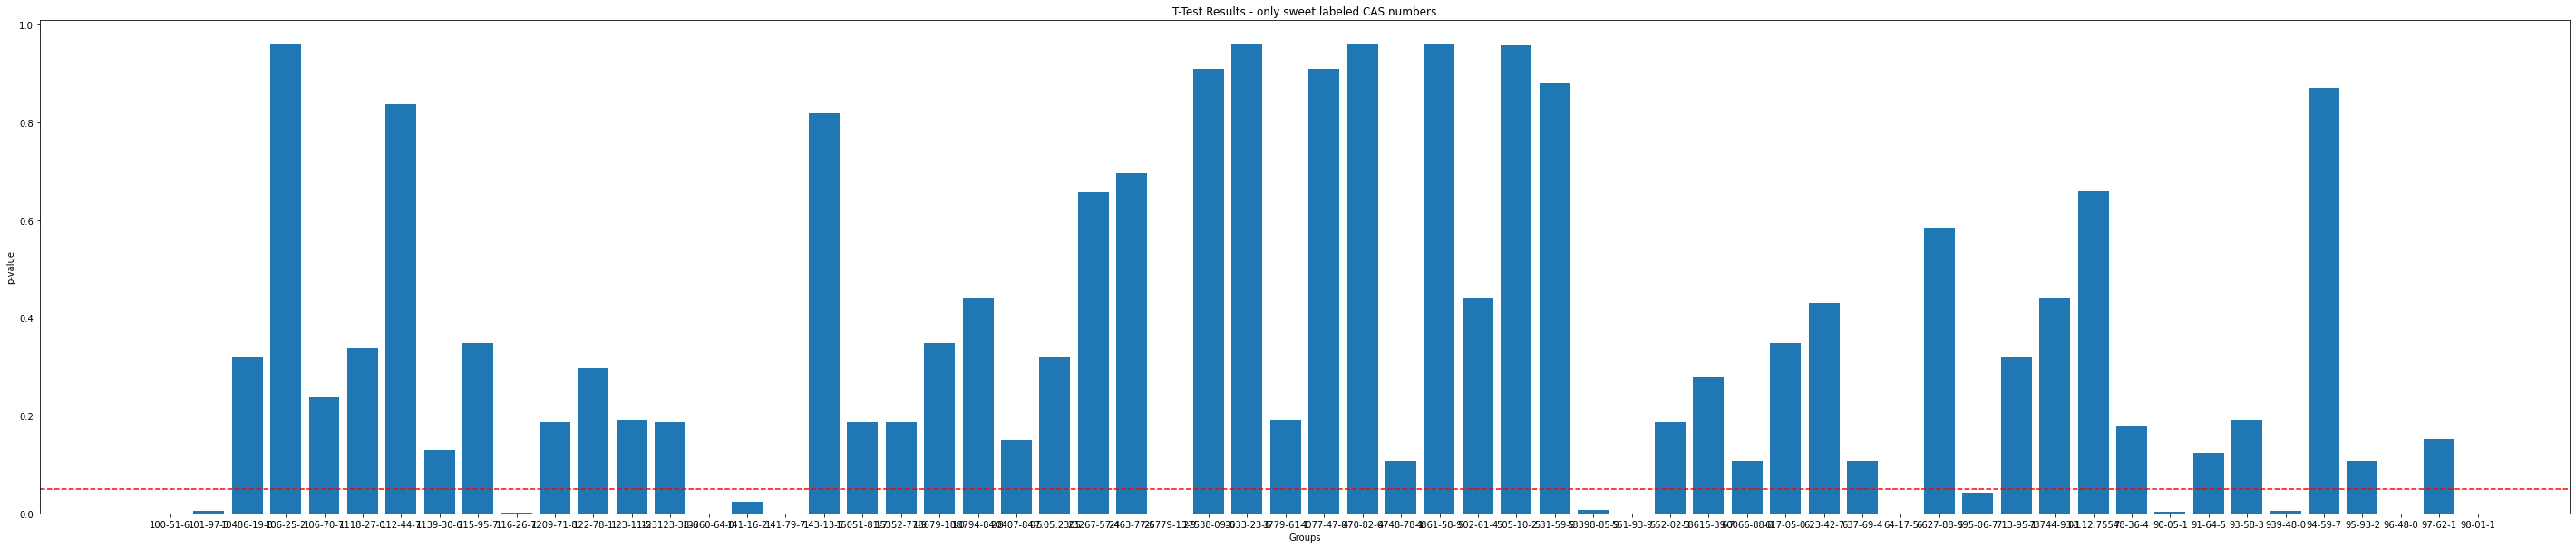

In [895]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
plt.bar(labels_gpt, p_values_gpt)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - only sweet labeled CAS numbers')
plt.show()


all CAS numbers

In [640]:
label_all_gpt,p_val_all_gpt, significant_CAS_all_gpt = check_significant_CAS(violin_df_gpt,'sweet')

CAS: 6485-40-1
t-statistic = -2.5443137195633785
p-value = 0.012735378551686998
CAS: 3033-23-6
t-statistic = 0.14572012806042545
p-value = 0.8844833398053815
CAS: 21284-22-0
t-statistic = 1.1763002998824441
p-value = 0.24272071851701368
CAS: 38427-78-0
t-statistic = 1.096378662460081
p-value = 0.27597375244654726
CAS: 495-61-4
t-statistic = 0.5217623762882435
p-value = 0.6031770136389836
CAS: 29873-99-2
t-statistic = 0.5217623762882435
p-value = 0.6031770136389836
CAS: 6909-30-4
t-statistic = 0.7334331882477467
p-value = 0.46528892925597165
CAS: 99-49-0
t-statistic = -2.5443137195633785
p-value = 0.012735378551686998
CAS: 2244-16-8
t-statistic = -2.5443137195633785
p-value = 0.012735378551686998
CAS: 876-17-5
t-statistic = 0.14572012806042545
p-value = 0.8844833398053815
CAS: 5989-27-5
t-statistic = -0.7193534016094701
p-value = 0.47387346334844427
CAS: 4674-50-4
t-statistic = 1.096378662460081
p-value = 0.27597375244654726
CAS: 2243-33-6
t-statistic = -0.7193534016094701
p-value = 0.4

In [686]:
len(significant_CAS_all_gpt)/len(label_all_gpt)

0.09165526675786594

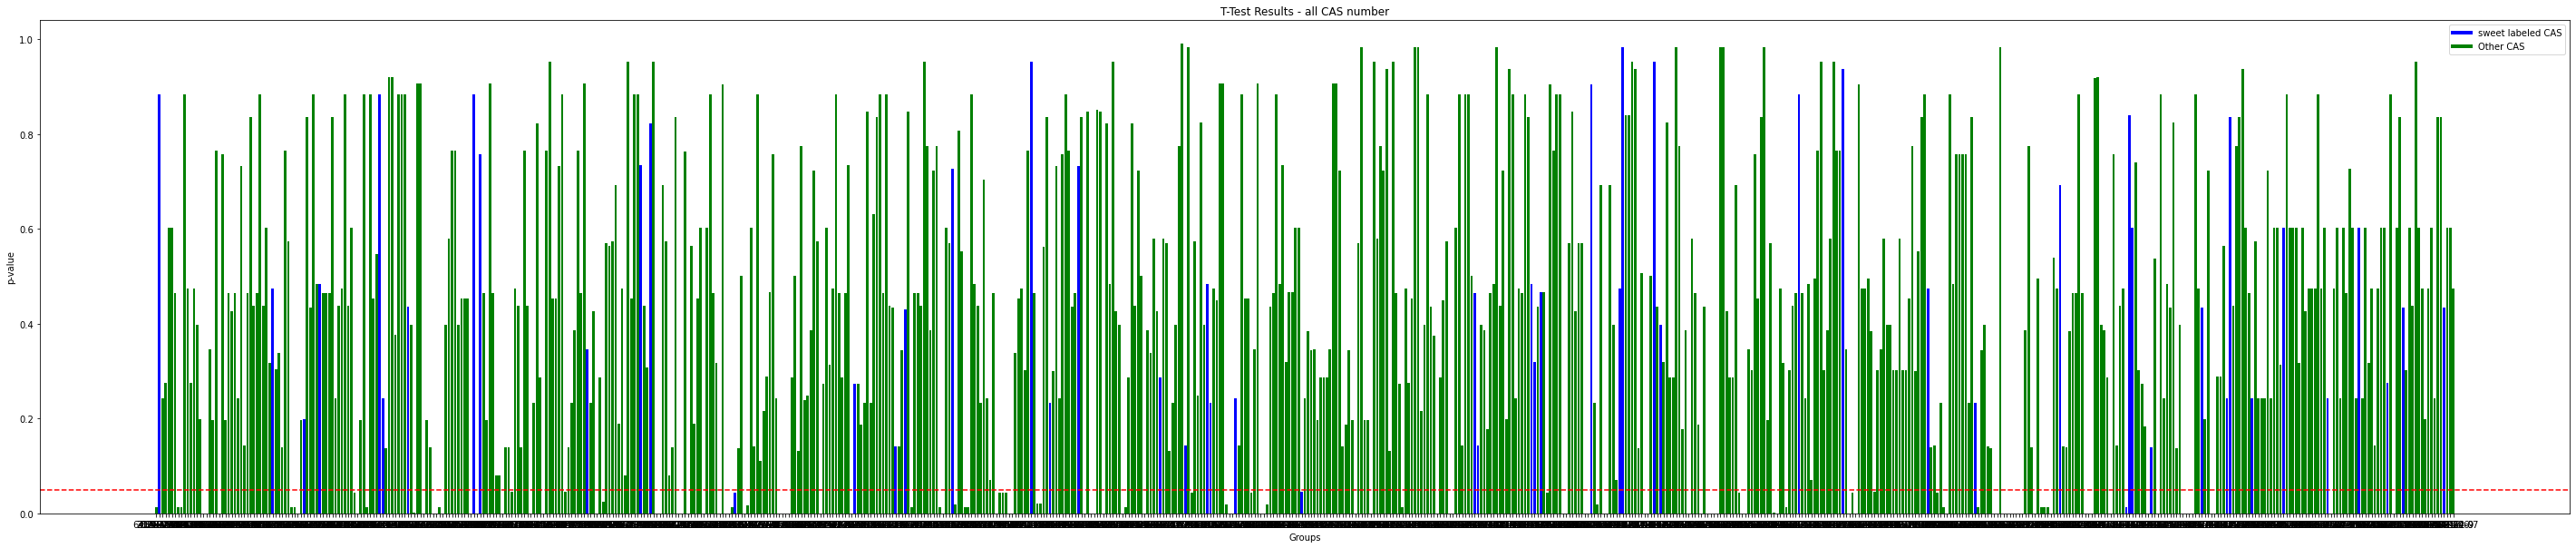

In [641]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
colors = ['b' if x in sweet_descriptors_CAS else 'g' for x in label_all]
plt.bar(label_all_gpt, p_val_all_gpt, color=colors)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet labeled CAS'),
                  Line2D([0], [0], color='g', lw=4, label='Other CAS')]
plt.legend(handles=legend_entries)

plt.show()


### fruit -> TOD O

In [897]:
label_all_fruit,p_val_all_fruit, significant_CAS_all_fruit = check_significant_CAS(violin_df,'fruit')

CAS: 6485-40-1
t-statistic = -0.19936529602810923
p-value = 0.8434177444343463
CAS: 3033-23-6
t-statistic = -2.098286422864329
p-value = 0.04502600810763351
CAS: 21284-22-0
t-statistic = 3.0191522077367625
p-value = 0.005357146044510574
CAS: 38427-78-0
t-statistic = 2.8903761800744623
p-value = 0.007353718786374152
CAS: 495-61-4
t-statistic = 1.092039853370381
p-value = 0.28412321614147795
CAS: 29873-99-2
t-statistic = 1.092039853370381
p-value = 0.28412321614147795
CAS: 6909-30-4
t-statistic = -0.39020265764605633
p-value = 0.6993394242756104
CAS: 99-49-0
t-statistic = -0.19936529602810923
p-value = 0.8434177444343463
CAS: 2244-16-8
t-statistic = -0.19936529602810923
p-value = 0.8434177444343463
CAS: 876-17-5
t-statistic = -2.098286422864329
p-value = 0.04502600810763351
CAS: 5989-27-5
t-statistic = 1.0174209144862685
p-value = 0.3176644464375355
CAS: 4674-50-4
t-statistic = 2.8903761800744623
p-value = 0.007353718786374152
CAS: 2243-33-6
t-statistic = 1.0174209144862685
p-value = 0.3

In [898]:
sig_fruit= 0
for CAS_fruit in significant_CAS_all_fruit:
    if CAS_fruit in fruit_descriptors_CAS:
        sig_fruit+=1 

In [899]:
sig_fruit/len(fruit_descriptors_CAS)

0.5142857142857142

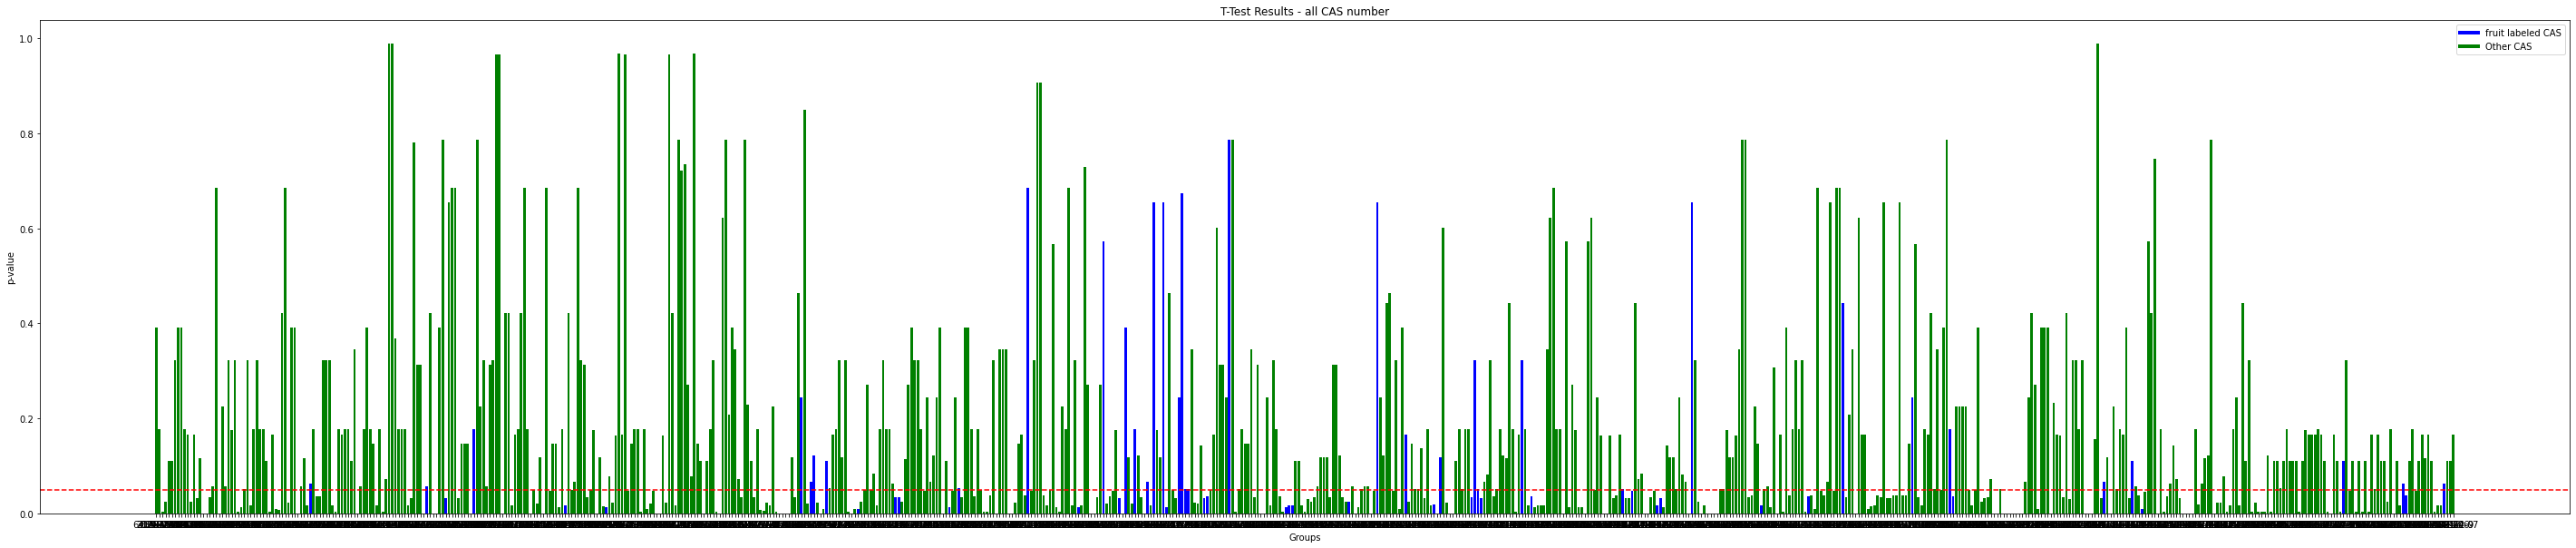

In [235]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
colors = ['b' if x in fruit_descriptors_CAS else 'g' for x in label_all_fruit]
plt.bar(label_all_fruit, p_val_all_fruit, color=colors)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='fruit labeled CAS'),
                  Line2D([0], [0], color='g', lw=4, label='Other CAS')]
plt.legend(handles=legend_entries)

plt.show()
